# Individual Income Tax Analysis


As a tax analyst who is also interested in data analysis, it is natually for me to be curious about various tax data. Since it is the time of the year to make estimate payment for individual tax, I am more interested in individual tax. I will analyze the individual income tax data for the past 5 years.

Here are some initial quesiton for exploration:

* How many people file tax returns each year?
* How many people use paid tax preparer?
* Relationship between salaries and AGI and total tax
* Which state pays the most tax?
* Which tax bracket has most people, and which tax bracket has the most tax?
* After the tax reform, what will the distribution look like?
* Will the individual income tax increase or decrease after the reform?
* There are a small group of people with higher tax rate than before. How many people are there and where do most of these people live?

## Dataset

The dataset can be found in [Kaggle](https://www.kaggle.com/irs/individual-income-tax-statistics/data) or [IRS](https://www.irs.gov/statistics/soi-tax-stats-individual-income-tax-statistics-zip-code-data-soi). It is saved separately as csv files for analysis. The detail information about column name and explanation can be found in "field_definitions.csv" file. Detail information can also be found in [IRS](https://www.irs.gov/statistics/soi-tax-stats-individual-income-tax-statistics-zip-code-data-soi). The original dataset is not consistent each year, so I will only use the following columns for this analysis. I have manipulate them to make it easiler to understand.

* state - 2 letter state abbreviation
* zipcode
* agi_class
* num_of_returns - number of returns
* agi - AGI
* total_wages - total amount of salaries & wages
* total_capital_gl - total amount of capital gain/loss
* total_tax - Total income tax amount
* prep - Number of returns using a Paid Preparer

AGI_Stub information shows below:

* 1 = \$1 under \$25,000 
* 2 = \$25,000 under \$50,000 
* 3 = \$50,000 under \$75,000 
* 4 = \$75,000 under \$100,000 
* 5 = \$100,000 under \$200,000 
* 6 = \$200,000 or more

## Getting Started

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [48]:
%run read_files.py

After reading the data, it needs to be cleaned and change to the correct format for further analysis.

In [49]:
raw_data.head()

state  zipcode  agi_class  num_of_returns    agi  total_wages  \
0    AK    99501        1.0          1459.0   1709       5588.0   
1    AK    99501        2.0          1713.0  29943      24052.0   
2    AK    99501        3.0          1896.0  67861      57409.0   
3    AK    99501        4.0           839.0  51347      36871.0   
4    AK    99501        5.0           417.0  35984      24282.0   

  total_capital_gl total_tax prep  year  
0              209       116  730  2005  
1              180      1436  927  2005  
2              586      5896  905  2005  
3             1687      6245  467  2005  
4              981      5134  227  2005

In [61]:
raw_data.dtypes

state                object
zipcode               int64
agi_class           float64
num_of_returns      float64
agi                  object
total_wages         float64
total_capital_gl     object
total_tax            object
prep                 object
year                  int64
dtype: object

In [62]:
raw_data['agi_class'] = raw_data['agi_class'].astype('object')

In [67]:
raw_data[['agi', 'total_capital_gl', 'total_tax', 'prep']] = raw_data[
    ['agi', 'total_capital_gl', 'total_tax', 'prep']].apply(pd.to_numeric, errors='coerce')

In [68]:
raw_data.dtypes

state                object
zipcode               int64
agi_class            object
num_of_returns      float64
agi                 float64
total_wages         float64
total_capital_gl    float64
total_tax           float64
prep                float64
year                  int64
dtype: object

In [69]:
raw_data.shape

(1953802, 10)

In [71]:
raw_data.describe()

zipcode  num_of_returns           agi   total_wages  \
count  1.953802e+06    1.931287e+06  1.922207e+06  1.928778e+06   
mean   4.241869e+04    1.313526e+03  8.434421e+03  8.550801e+06   
std    3.059228e+04    3.329159e+04  6.322080e+04  6.023600e+07   
min    0.000000e+00    0.000000e+00 -4.407640e+05 -8.545497e+06   
25%    1.471500e+04    5.000000e+01  5.100000e+01  3.625000e+03   
50%    4.205800e+04    1.900000e+02  2.500000e+02  2.127500e+04   
75%    6.743800e+04    8.200000e+02  1.350000e+03  1.980748e+05   
max    9.999900e+04    1.557362e+07  1.791496e+07  1.516317e+10   

       total_capital_gl     total_tax          prep          year  
count      1.892918e+06  1.872302e+06  1.910656e+06  1.953802e+06  
mean       6.079098e+06  5.754828e+05  1.085569e+06  2.009570e+03  
std        3.450416e+07  1.647389e+07  1.294756e+07  3.339095e+00  
min       -1.298000e+03 -2.309389e+06  0.000000e+00  2.005000e+03  
25%        5.050000e+02  1.000000e-04  1.200000e+02  2.006000e+03  
50%        9.930000e+03  2.340000e+02  1.100000e+03  2.010000e+03  
75%        1.510032e+05  2.863000e+03  1.415100e+04  2.013000e+03  
max        5.177843e+09  7.993815e+09  3.872201e+09  2.015000e+03

In [72]:
agi = pd.pivot_table(raw_data, values='agi',
                         index=['year'], columns=['state'], aggfunc=np.sum)

In [73]:
agi

state            AK            AL            AR            AZ            CA  \
year                                                                          
2005   1.617382e+07  8.691169e+07  4.722142e+07  1.341480e+08  9.506890e+08   
2006   1.738546e+07  9.374150e+07  4.982689e+07  1.453026e+08  1.016227e+09   
2007   1.613020e+05  1.367944e+06  8.095150e+05  1.532714e+06  1.065315e+07   
2008   1.548140e+05  1.282364e+06  7.462050e+05  1.457584e+06  1.030473e+07   
2009   2.439420e+05  2.466978e+06  1.448414e+06  2.552708e+06  2.019837e+07   
2010   2.472740e+05  2.451302e+06  1.451586e+06  2.652548e+06  2.039359e+07   
2011   3.164160e+05  2.466524e+06  1.494820e+06  2.860666e+06  2.102571e+07   
2012   3.080700e+05  2.441700e+06  1.474630e+06  2.821590e+06  2.114538e+07   
2013   3.009400e+05  2.391570e+06  1.444980e+06  2.811290e+06  2.139720e+07   
2014   3.004700e+05  2.360590e+06  1.428320e+06  2.801720e+06  2.159175e+07   
2015   2.947200e+05  2.310930e+06  1.404240e+06  2.786360e+06  2.179311e+07   

state            CO            CT            DC            DE            FL  \
year                                                                          
2005   1.247819e+08  1.304361e+08  1.925834e+07  2.297680e+07  4.667008e+08   
2006   1.370753e+08  1.402874e+08  2.090154e+07  2.385977e+07  4.987639e+08   
2007   1.213146e+06  1.004356e+06  1.507230e+05  2.176110e+05  5.122105e+06   
2008   1.165624e+06  9.604750e+05  1.467420e+05  2.061160e+05  4.827494e+06   
2009   2.223482e+06  1.860740e+06  2.934980e+05  4.032760e+05  9.239214e+06   
2010   2.252570e+06  1.868900e+06  2.946540e+05  4.086540e+05  9.377010e+06   
2011   2.354500e+06  1.894648e+06  3.006620e+05  4.121300e+05  9.672370e+06   
2012   2.355670e+06  1.884930e+06  3.029800e+05  4.063000e+05  9.745860e+06   
2013   2.386360e+06  1.879120e+06  3.030100e+05  4.086700e+05  9.821740e+06   
2014   2.406840e+06  1.869140e+06  3.057700e+05  4.046200e+05  9.905360e+06   
2015   2.404000e+06  1.866940e+06  3.041900e+05  4.069300e+05  1.007239e+07   

state      ...                 SD            TN            TX            UT  \
year       ...                                                                
2005       ...       1.600203e+07  1.220252e+08  4.968350e+08  5.032337e+07   
2006       ...       1.731776e+07  1.316412e+08  5.532683e+08  5.648599e+07   
2007       ...       2.376500e+05  1.683673e+06  5.930587e+06  5.923270e+05   
2008       ...       2.123430e+05  1.553372e+06  5.698883e+06  5.730720e+05   
2009       ...       4.256280e+05  2.976406e+06  1.112039e+07  1.106894e+06   
2010       ...       4.287520e+05  2.986936e+06  1.117879e+07  1.105206e+06   
2011       ...       4.462160e+05  3.011242e+06  1.160860e+07  1.158430e+06   
2012       ...       4.500400e+05  2.973610e+06  1.174243e+07  1.176560e+06   
2013       ...       4.460600e+05  2.919350e+06  1.179966e+07  1.192210e+06   
2014       ...       4.464300e+05  2.890520e+06  1.178234e+07  1.200060e+06   
2015       ...       4.451100e+05  2.852940e+06  1.166239e+07  1.218260e+06   

state            VA            VT            WA            WI            WV  \
year                                                                          
2005   2.104606e+08  1.453034e+07  1.665800e+08  1.309919e+08  3.000661e+07   
2006   2.250394e+08  1.544305e+07  1.833851e+08  1.391369e+08  3.145965e+07   
2007   1.854114e+06  1.702060e+05  1.472523e+06  1.553871e+06  4.339100e+05   
2008   1.760493e+06  1.558390e+05  1.403350e+06  1.482969e+06  3.783520e+05   
2009   3.441630e+06  2.989200e+05  2.702042e+06  2.880014e+06  7.446060e+05   
2010   3.449054e+06  2.996180e+05  2.721008e+06  2.904918e+06  7.484361e+05   
2011   3.510302e+06  3.102280e+05  2.778868e+06  2.943820e+06  7.894921e+05   
2012   3.463040e+06  3.063200e+05  2.759930e+06  2.935130e+06  7.668300e+05   
2013   3.405660e+06  3.038500e+05  2.751270e+06  2.917590e+06  7.510900e+05   
2014   3.377770e+06  3.040300e+05  2.768870e+06

## Explore the Dataset

To answer my initial question, I want to see how many people file returns each year, and whether it keeps increasing each year.

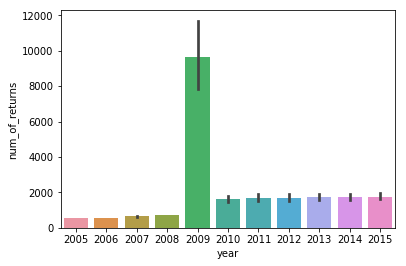

In [94]:
sns.barplot(data=raw_data, x='year', y='num_of_returns')

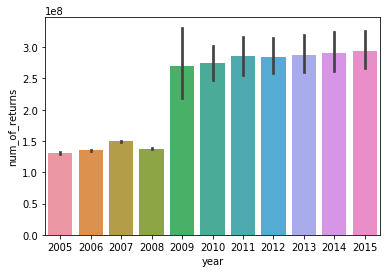

In [97]:
sns.barplot(data=raw_data, x='year', y='num_of_returns', estimator=sum)

In [101]:
raw_data[raw_data['year'] == 2009]['state'].isnull().any()

False

In [ ]:
sns.barplot(data=raw_data, x='year', y='num_of_returns', )

This is very interesting since the number of returns should not change so dramatically. It might be something hidden in the data. 

In [91]:
raw_data[raw_data['year'] == 2009]['num_of_returns'].mean()

9655.720561317878

In [92]:
raw_data[raw_data['year'] == 2010]['num_of_returns'].mean()

1642.2794369955084

In [98]:
num_of_return = pd.pivot_table(raw_data, values='num_of_returns',
                         index=['year'], columns=['state'], aggfunc=np.sum, margins=True)
num_of_return['All']

year
2005    1.305613e+08
2006    1.349555e+08
2007    1.491447e+08
2008    1.376662e+08
2009    2.690373e+08
2010    2.742968e+08
2011    2.853566e+08
2012    2.842682e+08
2013    2.875209e+08
2014    2.900781e+08
2015    2.939092e+08
All     2.536795e+09
Name: All, dtype: float64

In [83]:
tips = sns.load_dataset("tips")
tips

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
5         25.29  4.71    Male     No   Sun  Dinner     4
6          8.77  2.00    Male     No   Sun  Dinner     2
7         26.88  3.12    Male     No   Sun  Dinner     4
8         15.04  1.96    Male     No   Sun  Dinner     2
9         14.78  3.23    Male     No   Sun  Dinner     2
10        10.27  1.71    Male     No   Sun  Dinner     2
11        35.26  5.00  Female     No   Sun  Dinner     4
12        15.42  1.57    Male     No   Sun  Dinner     2
13        18.43  3.00    Male     No   Sun  Dinner     4
14        14.83  3.02  Female     No   Sun  Dinner     2
15        21.58  3.92    Male     No   Sun  Dinner     2
16        10.33  1.67  Female     No   Sun  Dinner     3
17        16.29  3.71    Male     No   Sun  Dinner     3
18        16.97  3.50  Female     No   Sun  Dinner     3
19        20.65  3.35    Male     No   Sat  Dinner     3
20        17.92  4.08    Male     No   Sat  Dinner     2
21        20.29  2.75  Female     No   Sat  Dinner     2
22        15.77  2.23  Female     No   Sat  Dinner     2
23        39.42  7.58    Male     No   Sat  Dinner     4
24        19.82  3.18    Male     No   Sat  Dinner     2
25        17.81  2.34    Male     No   Sat  Dinner     4
26        13.37  2.00    Male     No   Sat  Dinner     2
27        12.69  2.00    Male     No   Sat  Dinner     2
28        21.70  4.30    Male     No   Sat  Dinner     2
29        19.65  3.00  Female     No   Sat  Dinner     2
..          ...   ...     ...    ...   ...     ...   ...
214       28.17  6.50  Female    Yes   Sat  Dinner     3
215       12.90  1.10  Female    Yes   Sat  Dinner     2
216       28.15  3.00    Male    Yes   Sat  Dinner     5
217       11.59  1.50    Male    Yes   Sat  Dinner     2
218        7.74  1.44    Male    Yes   Sat  Dinner     2
219       30.14  3.09  Female    Yes   Sat  Dinner     4
220       12.16  2.20    Male    Yes   Fri   Lunch     2
221       13.42  3.48  Female    Yes   Fri   Lunch     2
222        8.58  1.92    Male    Yes   Fri   Lunch     1
223       15.98  3.00  Female     No   Fri   Lunch     3
224       13.42  1.58    Male    Yes   Fri   Lunch     2
225       16.27  2.50  Female    Yes   Fri   Lunch     2
226       10.09  2.00  Female    Yes   Fri   Lunch     2
227       20.45  3.00    Male     No   Sat  Dinner     4
228       13.28  2.72    Male     No   Sat  Dinner     2
229       22.12  2.88  Female    Yes   Sat  Dinner     2
230       24.01  2.00    Male    Yes   Sat  Dinner     4
231       15.69  3.00    Male    Yes   Sat  Dinner     3
232       11.61  3.39    Male     No   Sat  Dinner     2
233       10.77  1.47    Male     No   Sat  Dinner     2
234       15.53  3.00    Male    Yes   Sat  Dinner     2
235       10.07  1.25    Male     No   Sat  Dinner     2
236       12.60  1.00    Male    Yes   Sat  Dinner     2
237       32.83  1.17    Male    Yes   Sat  Dinner     2
238       35.83  4.67  Female     No   Sat  Dinner     3
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

In [88]:
tips[tips['day'] == 'Sun']['total_bill'].mean()

21.410000000000004

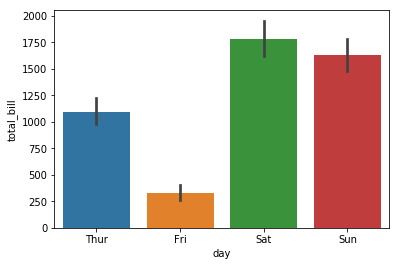

In [95]:
sns.barplot(data=tips, x='day', y='total_bill', estimator=sum)